# Sinarmas Technical Assesment

This is a notebook for technical assignment given by Sinarmas APP

## Data

I will be working on made up / masked data given by Sinarmas APP.

In [1]:
#Load and Setup

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import randint
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import plot_roc_curve

from imblearn.over_sampling import SMOTE

In [2]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
df = pd.read_csv('machine_event.csv', sep = ';')
df.head()

,date,machine,event,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9
0,01/01/2015,S1F01085,0,0,7,407438,215630672,6,0,52,56,0
1,01/01/2015,S1F0166B,0,3,0,403174,61370680,6,0,0,0,0
2,01/01/2015,S1F01E6Y,0,0,0,237394,173295968,12,0,0,0,0
3,01/01/2015,S1F01JE0,0,0,0,410186,79694024,6,0,0,0,0
4,01/01/2015,S1F01R2B,0,0,3,313173,135970480,15,0,0,0,0


In [4]:
df['date'] = pd.to_datetime(df.date, format="%m/%d/%Y")

## Explore

Get a feel to it.

1. What am i trying to solve?
2. What is this data?
3. Is the data clean? any missing, any outliers?
4. Can i make changes to the data? add, transform or remove?

## What to solve?

"He engaged with the APP Data Scientist team to better understand machine event rates to improve his machine maintenance and provisioning. The customer provides you with a sample dataset with machine events statistics and tasks you
to use your own way to analyse the data."

The goal is to make a machine learning project to predict the event of certain machine (event = is 0 (Negative) or 1 (Positive)), based on features in the data.

## The Data

1. date = date, not sure what it is, it could be the date of certain machine being inspected/assessed on.

2. machine = machine serial number / identification number.

3. feature 1 trough 9 = attributes about the machine

4. event = target to be predicted (1 = event, 0 = no event)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   date      124494 non-null  datetime64[ns]
 1   machine   124494 non-null  object        
 2   event     124494 non-null  int64         
 3   feature1  124494 non-null  int64         
 4   feature2  124494 non-null  int64         
 5   feature3  124494 non-null  int64         
 6   feature4  124494 non-null  int64         
 7   feature5  124494 non-null  int64         
 8   feature6  124494 non-null  int64         
 9   feature7  124494 non-null  int64         
 10  feature8  124494 non-null  int64         
 11  feature9  124494 non-null  int64         
dtypes: datetime64[ns](1), int64(10), object(1)
memory usage: 11.4+ MB


In [6]:
df.isna().sum()

date        0
machine     0
event       0
feature1    0
feature2    0
feature3    0
feature4    0
feature5    0
feature6    0
feature7    0
feature8    0
feature9    0
dtype: int64

In [7]:
df.describe()

,event,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9
count,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00
mean,0.00,9.94,12.45,260172.86,122386752.67,14.22,0.29,1.74,159.48,0.44
std,0.03,185.75,191.43,99151.01,70459597.49,15.94,7.44,22.91,2179.66,11.16
min,0.00,0.00,0.00,8.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,221452.00,61276754.00,8.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,249799.50,122795744.00,10.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,310266.00,183308370.00,12.00,0.00,0.00,0.00,0.00
max,1.00,24929.00,18701.00,689161.00,244140480.00,98.00,832.00,1666.00,64968.00,1248.00


In [8]:
df[df['event'] == 0].describe()

,event,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9
count,124388.00,124388.00,124388.00,124388.00,124388.00,124388.00,124388.00,124388.00,124388.00,124388.00
mean,0.00,9.95,12.44,260174.45,122382671.81,14.22,0.27,1.70,156.12,0.40
std,0.00,185.82,191.46,99147.77,70460628.25,15.94,6.56,22.16,2145.52,9.84
min,0.00,0.00,0.00,8.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,221451.75,61265844.00,8.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,249794.00,122785512.00,10.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,310266.25,183306934.00,12.00,0.00,0.00,0.00,0.00
max,0.00,24929.00,18701.00,689161.00,244140480.00,98.00,832.00,1666.00,64968.00,1248.00


In [9]:
df[df['event'] == 1].describe()

,event,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9
count,106.00,106.00,106.00,106.00,106.00,106.00,106.00,106.00,106.00,106.00
mean,1.00,3.91,23.08,258303.48,127175526.92,15.46,30.62,54.63,4109.43,45.93
std,0.00,31.56,153.45,103349.31,69401666.20,15.55,117.03,193.49,12803.75,175.55
min,1.00,0.00,0.00,24.00,4527376.00,3.00,0.00,0.00,0.00,0.00
25%,1.00,0.00,0.00,230028.75,70462350.00,8.00,0.00,0.00,0.00,0.00
50%,1.00,0.00,0.00,267648.50,139117253.50,10.00,0.00,1.50,0.00,0.00
75%,1.00,0.00,1.00,309156.00,183706600.00,14.00,16.00,18.75,1182.00,24.00
max,1.00,318.00,1165.00,574599.00,243261216.00,91.00,832.00,1666.00,64784.00,1248.00


Lets compare stats between event 0 and 1 machines.

- feature1 = event 1 has lower mean
- feature2 = event 1 has higher mean
- feature 3 & 4 = the stats are about the same
- feature 5 = event 1 started with value 3 but the rest is the same, so it pretty much the same
- feature 6, 7 ,8 and 9 = this is where the difference come in, these features mean in negative event are very low compare to their couterpart, even though the have the same range, the mean are very much different.

In [10]:
df[df['event'] == 1].machine

4885      S1F0RRB1
6879      S1F0CTDN
8823      W1F0PNA5
11957     W1F13SRV
12668     W1F1230J
            ...   
109927    W1F1CB5E
114251    Z1F0MRPJ
122118    S1F0JGJV
122808    Z1F14BGY
124329    W1F0T0B1
Name: machine, Length: 106, dtype: object

In [11]:
len(df[df['event'] == 1].machine.unique())

106

In [12]:
event1machine = df[df['event'] == 1].machine.unique()

In [13]:
df[df['event'] == 0].machine

0         S1F01085
1         S1F0166B
2         S1F01E6Y
3         S1F01JE0
4         S1F01R2B
            ...   
124489    Z1F0MA1S
124490    Z1F0Q8RT
124491    Z1F0QK05
124492    Z1F0QL3N
124493    Z1F0QLC1
Name: machine, Length: 124388, dtype: object

In [14]:
len(df[df['event'] == 0].machine.unique())

1168

In [15]:
event0machine = df[df['event'] == 0].machine.unique()

Lets sample random machine with positive event and no positive event

In [16]:
df[df['machine'] == random.choice(event1machine)]

,date,machine,event,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9
648,2015-01-01,W1F0PNA5,0,0,0,224801,185403491,30,8,26,64776,12
1811,2015-01-02,W1F0PNA5,0,0,0,224801,211326211,30,8,90,64776,12
2974,2015-01-03,W1F0PNA5,0,0,0,224801,234878700,30,8,91,64776,12
4137,2015-01-04,W1F0PNA5,0,0,0,224801,14442703,30,8,186,64776,12
5298,2015-01-05,W1F0PNA5,0,0,0,224801,38285364,30,8,399,64784,12
6404,2015-01-06,W1F0PNA5,0,0,0,224801,65311277,30,8,400,64784,12
7303,2015-01-07,W1F0PNA5,0,0,0,224801,88355682,30,8,405,64784,12
8067,2015-01-08,W1F0PNA5,0,0,0,224801,111562891,30,8,406,64784,12
8823,2015-01-09,W1F0PNA5,1,0,0,224801,136429411,30,8,406,64784,12


In [17]:
df[df['machine'] == random.choice(event0machine)]

,date,machine,event,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9
17,2015-01-01,S1F0322R,0,0,0,411399,34540712,9,0,0,0,0
1180,2015-01-02,S1F0322R,0,0,0,411399,141021008,9,0,0,0,0
2343,2015-01-03,S1F0322R,0,0,0,411399,54053048,9,0,0,0,0
3506,2015-01-04,S1F0322R,0,0,0,411557,47212984,9,0,0,0,0
4668,2015-01-05,S1F0322R,0,0,0,412644,207451240,9,0,0,0,0
5829,2015-01-06,S1F0322R,0,0,0,413828,240395944,9,0,0,0,0


## is there characteristic difference between machines that ever had 1 event compared to machines that never had 0 event?

In [18]:
machinewithevent1 = df[df['machine'].isin(event1machine.tolist())]
machinewithevent1.describe()

,event,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9
count,10713.00,10713.00,10713.00,10713.00,10713.00,10713.00,10713.00,10713.00,10713.00,10713.00
mean,0.01,6.30,15.85,247970.25,122631485.90,14.21,1.57,10.14,434.10,2.35
std,0.10,41.08,127.52,92216.68,70794291.61,16.97,16.49,64.77,3580.02,24.74
min,0.00,0.00,0.00,19.00,4224.00,2.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,222242.00,61036016.00,8.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,256129.00,123326224.00,9.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,299197.00,184069720.00,13.00,0.00,0.00,0.00,0.00
max,1.00,318.00,1165.00,574599.00,244135688.00,91.00,832.00,1666.00,64968.00,1248.00


In [19]:
machinewithnoevent1 = df[df['machine'].isin(event0machine.tolist())]
machinewithnoevent1.describe()

,event,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9
count,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00
mean,0.00,9.94,12.45,260172.86,122386752.67,14.22,0.29,1.74,159.48,0.44
std,0.03,185.75,191.43,99151.01,70459597.49,15.94,7.44,22.91,2179.66,11.16
min,0.00,0.00,0.00,8.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,221452.00,61276754.00,8.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,249799.50,122795744.00,10.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,310266.00,183308370.00,12.00,0.00,0.00,0.00,0.00
max,1.00,24929.00,18701.00,689161.00,244140480.00,98.00,832.00,1666.00,64968.00,1248.00


- machines that have event 1 has short ranges in feature 1 and 2 (3 also slightly shorter range by scale)
- machines that have event 1 has lower mean in feature 1
- machines that have event 1 has higher mean in feature 2, 6, 7, 8, 9
- feature 4 and 5 shares similar characteristic (potential to be eliminated from predictor variables)

In [20]:
df.date.min(), df.date.max()

(Timestamp('2015-01-01 00:00:00'), Timestamp('2015-11-02 00:00:00'))

I am going to assume that the machines are inspected everyday to gather the data(features).

it seems that almost everytime a 1 event occured, the report are stopped. i assumed the machines are put into a halt.

but that does not explain why is there are machines that never experience positive event, stopped their report.

In [21]:
# Target Distribution
df.event.value_counts()

0    124388
1       106
Name: event, dtype: int64

In [22]:
df.event.value_counts()[1]/(df.event.value_counts()[0]+df.event.value_counts()[1])*100

0.0851446656063746

The positive event is heavily under represented in the data, it will influence

## Data Variance

In [23]:
df.var()

event                     0.00
feature1              34502.07
feature2              36643.77
feature3         9830922754.74
feature4   4964554878180394.00
feature5                254.18
feature6                 55.31
feature7                524.80
feature8            4750907.82
feature9                124.44
dtype: float64

In [24]:
pd.DataFrame(df.drop(['event', 'machine', 'date'], axis=1)).var()

feature1              34502.07
feature2              36643.77
feature3         9830922754.74
feature4   4964554878180394.00
feature5                254.18
feature6                 55.31
feature7                524.80
feature8            4750907.82
feature9                124.44
dtype: float64

## Correlation Matrix

In [25]:
df.corr()

,event,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9
event,1.00,-0.00,0.00,-0.00,0.00,0.00,0.12,0.07,0.05,0.12
feature1,-0.00,1.00,0.53,0.01,0.00,-0.01,-0.00,0.10,-0.00,-0.00
feature2,0.00,0.53,1.00,0.02,0.00,0.01,0.01,0.04,-0.00,0.01
feature3,-0.00,0.01,0.02,1.00,-0.00,-0.02,-0.01,0.02,-0.03,-0.01
feature4,0.00,0.00,0.00,-0.00,1.00,-0.00,0.00,0.00,-0.00,0.00
feature5,0.00,-0.01,0.01,-0.02,-0.00,1.00,-0.01,-0.01,-0.01,-0.01
feature6,0.12,-0.00,0.01,-0.01,0.00,-0.01,1.00,0.05,0.14,1.00
feature7,0.07,0.10,0.04,0.02,0.00,-0.01,0.05,1.00,0.15,0.05
feature8,0.05,-0.00,-0.00,-0.03,-0.00,-0.01,0.14,0.15,1.00,0.14
feature9,0.12,-0.00,0.01,-0.01,0.00,-0.01,1.00,0.05,0.14,1.00


## Visualize the feature
### Predictors vs Target

<function matplotlib.pyplot.show(close=None, block=None)>

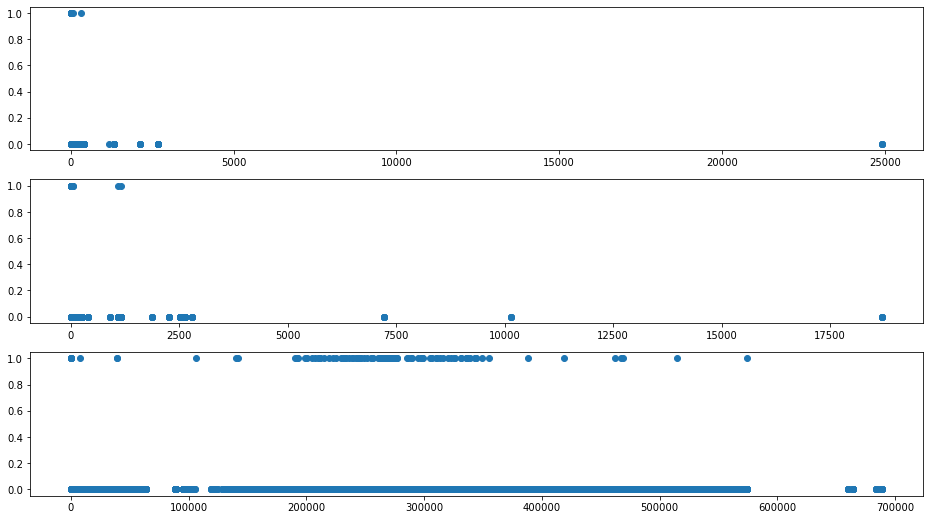

In [26]:
fig, ax = plt.subplots(3, 1, figsize=(16, 9))
ax[0].scatter(df.feature1, df.event)
ax[1].scatter(df.feature2, df.event)
ax[2].scatter(df.feature3, df.event)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

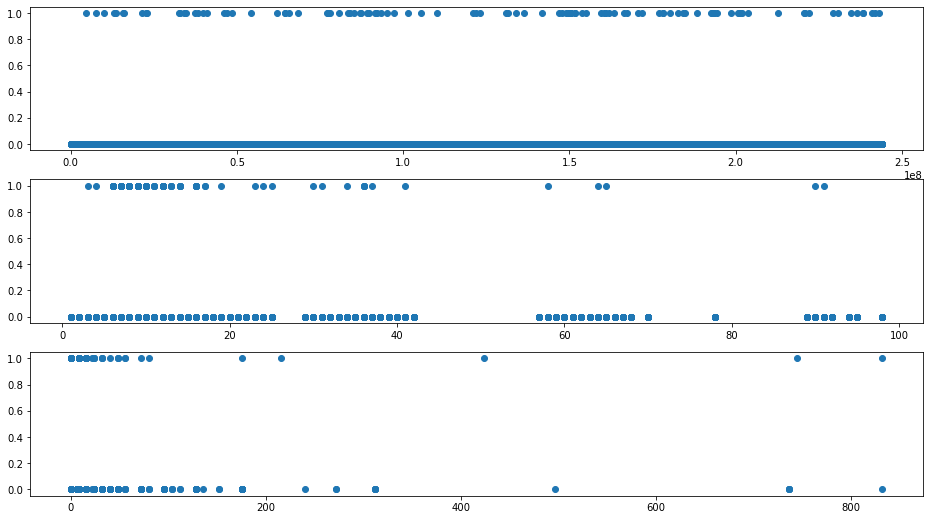

In [27]:
fig, ax = plt.subplots(3, 1, figsize=(16, 9))
ax[0].scatter(df.feature4, df.event)
ax[1].scatter(df.feature5, df.event)
ax[2].scatter(df.feature6, df.event)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

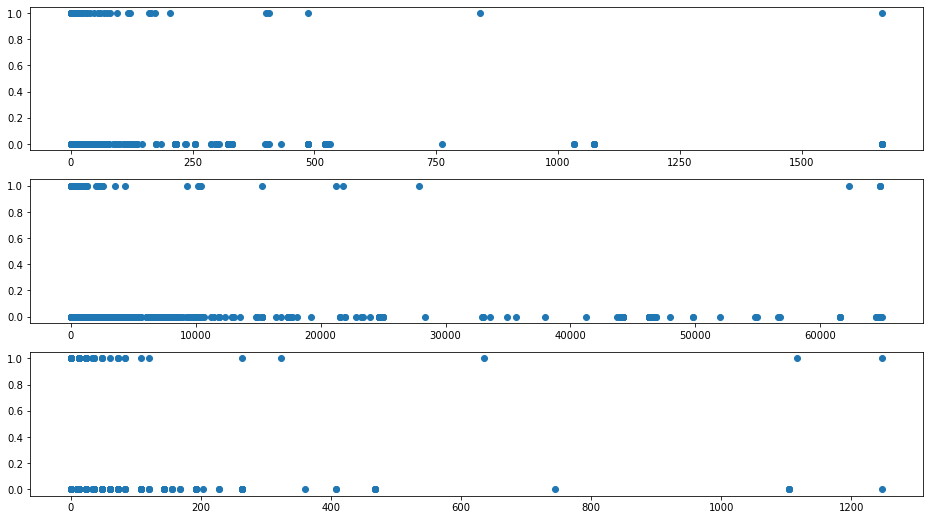

In [28]:
fig, ax = plt.subplots(3, 1, figsize=(16, 9))
ax[0].scatter(df.feature7, df.event)
ax[1].scatter(df.feature8, df.event)
ax[2].scatter(df.feature9, df.event)
plt.show

only feature 1 and 2 that shows a pattern where the higher the value is less likely the event to be positive. but remember the data for positive event is very very under represented

### Distribution

<function matplotlib.pyplot.show(close=None, block=None)>

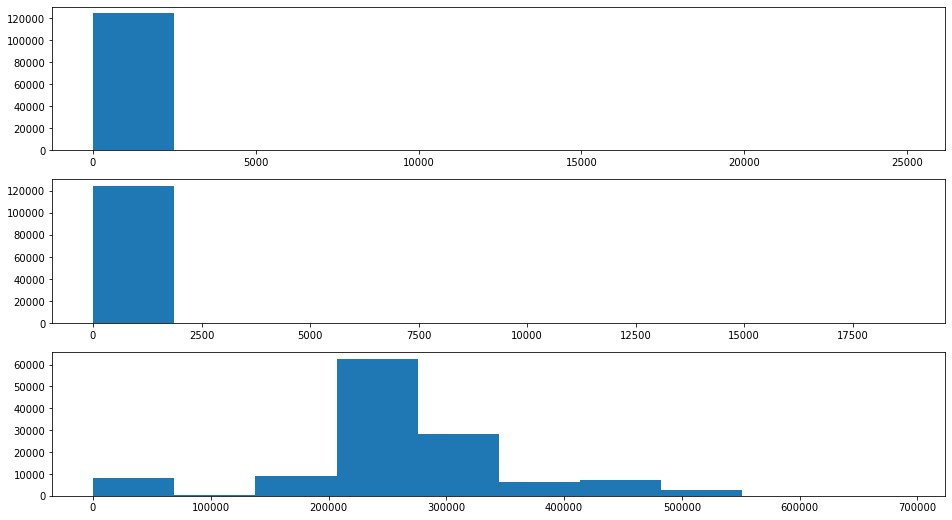

In [29]:
fig, ax = plt.subplots(3, 1, figsize=(16, 9))
ax[0].hist(df.feature1)
ax[1].hist(df.feature2)
ax[2].hist(df.feature3)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

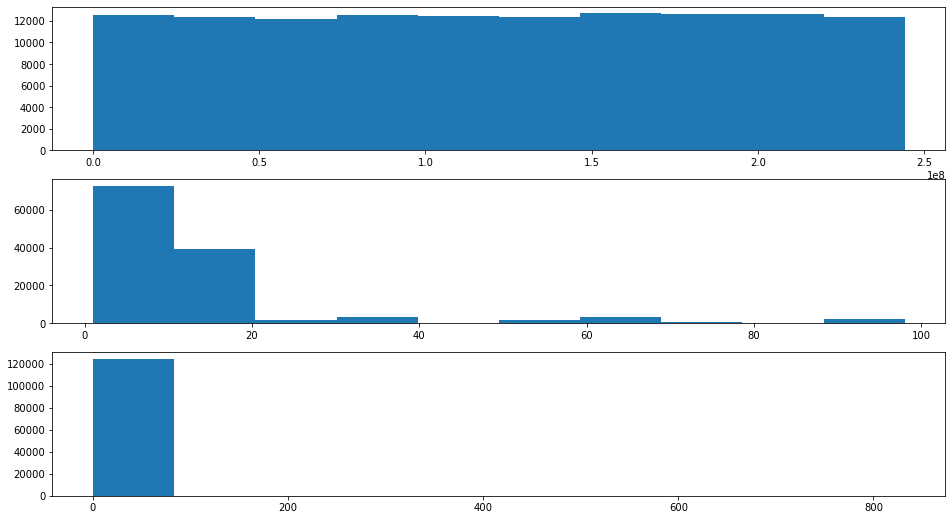

In [30]:
fig, ax = plt.subplots(3, 1, figsize=(16, 9))
ax[0].hist(df.feature4)
ax[1].hist(df.feature5)
ax[2].hist(df.feature6)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

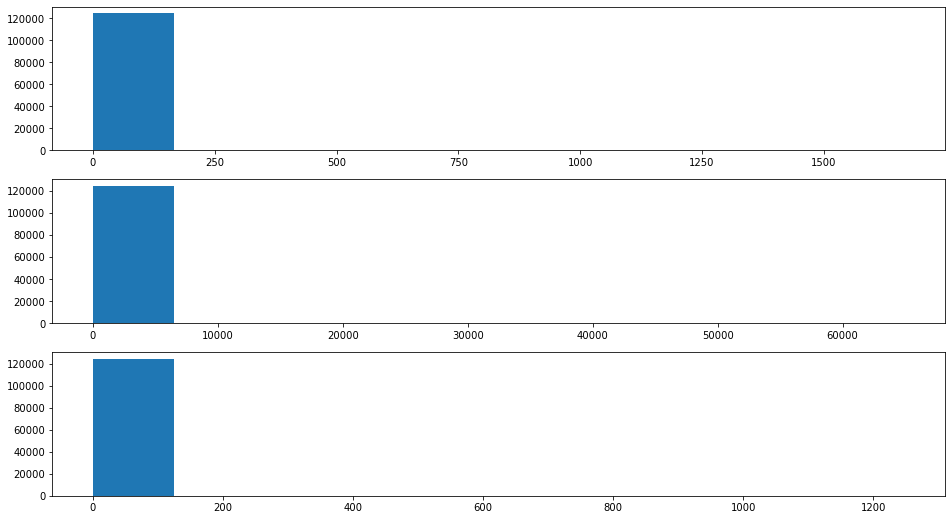

In [31]:
fig, ax = plt.subplots(3, 1, figsize=(16, 9))
ax[0].hist(df.feature7)
ax[1].hist(df.feature8)
ax[2].hist(df.feature9)
plt.show

all of the features are numerical data.

Feature 3 have normal distribution (not including outlier, a little bit skewed to the left that is)

Feature 4 evenly distributed across whole value

the rest are heavily skewed to the left.

## Findings and suspicions

### Findings

1. Most of our feature are heavily skewed to the the minimum value
2. Data ranges are varied
3. As a whole, the predictors are not strongly correlated with the target
4. There are features that correlated with each other, Feature 6 and 9 have STRONG CORRELATION, feature 1 and 2 have somewhat medium correlation.
5. Imbalanced class
6. Data variance ranges are wide.

Lets address it 1 by 1 :
1. This could indicate there are outliers in the data
2. varied ranges can be solved with scaling
3. Further Statistic analysis can be performed to figure out candidate for our model predictor
4. This VIOLATE the assumption of predictors should not have correlation to other predictor(s), either one of these predictors must be eliminated.
5. Model will most likely came out with biased result toward 0 event.


### Suspicions
1. Each machines seems to have different typical predictors value attached to it, this make it ambiguous to decide wether these are outliers to the whole data or is it the nature of that specific machines.
2. Lets assume that these machines seems to have different typical predictors compared to other machine on this data, then the data have to be rebuild based on their type.
3. It looks like the newer data entries of each machines are affected by their previous entries.


At this point we should consult with the data provider, for now lets move on.

# Data Prep

Based on the data features and target, its a binary classification problem where we predict 1 class or not.

What feature to use? for a prototype model, lets start with all the features provided.


In [32]:
X = df.drop(['event', 'machine', 'date'], axis=1)
y = df.event
X

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9
0,0,7,407438,215630672,6,0,52,56,0
1,3,0,403174,61370680,6,0,0,0,0
2,0,0,237394,173295968,12,0,0,0,0
3,0,0,410186,79694024,6,0,0,0,0
4,0,3,313173,135970480,15,0,0,0,0
...,...,...,...,...,...,...,...,...,...
124489,0,0,353705,18310224,10,8,0,0,12
124490,107,13,332792,172556680,11,0,4,96,0
124491,0,0,350410,19029120,11,0,0,4832,0
124492,0,0,358980,226953408,12,0,0,0,0


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify = y)

In [34]:
# Scaling the Data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # do not fit it again so it retain the information from training set, they have to match.
sscaler = StandardScaler()
X_train_sscaled = sscaler.fit_transform(X_train)
X_test_sscaled = sscaler.transform(X_test)

In [35]:
pd.DataFrame(X_train_scaled).var()

0   0.00
1   0.00
2   0.02
3   0.08
4   0.03
5   0.00
6   0.00
7   0.00
8   0.00
dtype: float64

# Modelling

Because BU specifically requests a probabilistic outcome, use Logistic regression, i will also explore decision trees for comparison

## Logistic Regression

Start with logistic regession to confirm my asumption that the algorithm will not learn anything regarding the postive event.

In [36]:
#instiate logreg model
logreg = LogisticRegression()

# fit logreg to the train set
logreg.fit(X_train_scaled, y_train)
logregpred = logreg.predict(X_test_scaled)
logregperf = logreg.score(X_test_scaled, y_test)*100
logregperf

99.91325022490682

99.9% Accuracy? thats too good to be true.

### Evaluate

In [37]:
confusion_matrix(y_test, logregpred)

array([[31097,     0],
       [   27,     0]], dtype=int64)

In [38]:
print(classification_report(y_test, logregpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31097
           1       0.00      0.00      0.00        27

    accuracy                           1.00     31124
   macro avg       0.50      0.50      0.50     31124
weighted avg       1.00      1.00      1.00     31124



C:\Users\fadhl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fadhl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fadhl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


As expected, model cannot learn pattern regarding the positive event. the model can predict all negative event and still come up with high accuracy.

## Decision Tree

can it improves?

In [39]:
tree = DecisionTreeClassifier()
tree.fit(X_train_sscaled, y_train)
treepred = tree.predict(X_test_sscaled)
tree.score(X_test_sscaled, y_test)*100

99.86184295077753

In [40]:
confusion_matrix(y_test, treepred)

array([[31080,    17],
       [   26,     1]], dtype=int64)

Decision Tree also cannot learn the positive event.

# Resampling Data

This could be done to combat imbalance data problem, the issue with this method is, by doing this, we will be cutting and/or create synthetic data. So the model will most likely trained on data that does not represent real situation.

In [41]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)
X.shape, X_sm.shape

((124494, 9), (248776, 9))

In [42]:
df['event'].value_counts()

0    124388
1       106
Name: event, dtype: int64

In [43]:
y_sm.value_counts()

1    124388
0    124388
Name: event, dtype: int64

We essentially doubling the data to match the minority class with majority class

# Remodelling

## LogReg

##### best model so far

In [44]:
X_sm_train, X_sm_test, y_sm_train, y_sm_test = train_test_split(X_sm,
                                                    y_sm,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify = y_sm)

In [45]:
# Scaling the Data
scaler = MinMaxScaler()
X_train_smscaled = scaler.fit_transform(X_sm_train)
X_test_smscaled = scaler.transform(X_sm_test) # do not fit it again so it retain the information from training set, they have to match.
sscaler = StandardScaler()
X_train_smsscaled = sscaler.fit_transform(X_sm_train)
X_test_smsscaled = sscaler.transform(X_sm_test)

In [46]:
#instiate logreg model
logregsm = LogisticRegression()

#fit logreg to the train set
logregsm.fit(X_train_smsscaled, y_sm_train)
logregsmpred = logregsm.predict(X_test_smsscaled)
logregsmperf = logregsm.score(X_test_smsscaled, y_sm_test)*100
logregsmperf

# logregsm.fit(X_sm_train, y_sm_train)
# logregsmpred = logregsm.predict(X_sm_test)
# logregsmperf = logregsm.score(X_sm_test, y_sm_test)*100
# logregsmperf

83.00707452367554

### Evaluation

In [47]:
confusion_matrix(y_sm_test, logregsmpred)

array([[24158,   720],
       [ 7735, 17143]], dtype=int64)

In [48]:
print(classification_report(y_sm_test, logregsmpred))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85     24878
           1       0.96      0.69      0.80     24878

    accuracy                           0.83     49756
   macro avg       0.86      0.83      0.83     49756
weighted avg       0.86      0.83      0.83     49756



Okay, so the just by oversampling the data, the model already performing way better, but is it?
this is performance run on resampled data, what is the score by predicting the real data?

In [49]:
X_train_sscaled2 = sscaler.transform(X_train)
X_test_sscaled2 = sscaler.transform(X_test)

In [50]:
realpred1 = logregsm.predict(X_test_sscaled2)
realperf1 = logregsm.score(X_test_sscaled2, y_test)*100
realperf1

97.04729469219895

In [51]:
np.set_printoptions(suppress=True)
pd.DataFrame(logregsm.coef_).T.iloc[:, 0]

0   -0.07
1    0.07
2    0.00
3   -0.07
4    0.10
5    2.46
6    5.59
7    2.85
8   17.76
Name: 0, dtype: float64

In [52]:
feature = pd.DataFrame(X_sm_train.columns, columns = ['feature'])
feature.iloc[:, 0]

0    feature1
1    feature2
2    feature3
3    feature4
4    feature5
5    feature6
6    feature7
7    feature8
8    feature9
Name: feature, dtype: object

In [53]:
featurecoef = pd.DataFrame((feature.iloc[:, 0], pd.DataFrame(logregsm.coef_).T.iloc[:, 0]), index=('feature', 'coef'))
featurecoef.T.sort_values(by='coef', ascending=False)

,feature,coef
8,feature9,17.76
6,feature7,5.59
7,feature8,2.85
5,feature6,2.46
4,feature5,0.10
1,feature2,0.07
2,feature3,0.00
0,feature1,-0.07
3,feature4,-0.07


In [54]:
confusion_matrix(y_test, realpred1)

array([[30192,   905],
       [   14,    13]], dtype=int64)

In [55]:
print(classification_report(y_test, realpred1))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     31097
           1       0.01      0.48      0.03        27

    accuracy                           0.97     31124
   macro avg       0.51      0.73      0.51     31124
weighted avg       1.00      0.97      0.98     31124



Tested on real data, the model perform better than the original data, now it has 48% recall.
it is STILL biased.

## Decision Tree

In [56]:
param = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param, cv=5)
tree_cv.fit(X_sm_train, y_sm_train)
tree_cv_pred = tree_cv.predict(X_sm_test)
tree_cv.score(X_sm_test, y_sm_test)

0.9972465632285553

### Feature Importance

In [57]:
fimp = pd.DataFrame((X_sm_train.columns, tree_cv.best_estimator_.feature_importances_), index=('feature', 'importance')).T.sort_values(by='importance', ascending=False)
fimp

,feature,importance
6,feature7,0.39
5,feature6,0.14
7,feature8,0.14
3,feature4,0.13
2,feature3,0.09
4,feature5,0.05
8,feature9,0.04
1,feature2,0.01
0,feature1,0.01


In [58]:
confusion_matrix(y_sm_test, tree_cv_pred)

array([[24783,    95],
       [   42, 24836]], dtype=int64)

In [59]:
print(classification_report(y_sm_test, tree_cv_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24878
           1       1.00      1.00      1.00     24878

    accuracy                           1.00     49756
   macro avg       1.00      1.00      1.00     49756
weighted avg       1.00      1.00      1.00     49756



Wow this is almost perfect. how does it perform on just the real data?

In [60]:
realpred2 = tree_cv.predict(X_test_sscaled2)
realperf2 = tree_cv.score(X_test_sscaled2, y_test)*100
realperf2

99.83613931371289

In [61]:
confusion_matrix(y_test, realpred2)

array([[31069,    28],
       [   23,     4]], dtype=int64)

In [62]:
print(classification_report(y_test, realpred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31097
           1       0.12      0.15      0.14        27

    accuracy                           1.00     31124
   macro avg       0.56      0.57      0.57     31124
weighted avg       1.00      1.00      1.00     31124



Decision Tree Model came out even more biased than LogisticRegression model.

# Dimension Reductional

9 Features are not high dimension by any means, but it might be the solution.

<BarContainer object of 9 artists>

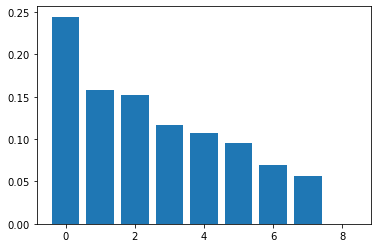

In [63]:
pcasmscaleddata = sscaler.fit_transform(X_sm)
pca = PCA()
pca.fit(pcasmscaleddata)
pcasmscaleddata2 = pca.transform(pcasmscaleddata)
exp_variance = pca.explained_variance_ratio_

fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), exp_variance)

In [64]:
cum_exp_variance = np.cumsum(exp_variance)
cum_exp_variance

array([0.24442932, 0.40209301, 0.55447591, 0.67099929, 0.77862033,
       0.87423838, 0.94349302, 0.99999965, 1.        ])

In [65]:
pca.explained_variance_ratio_[0]

0.24442932097858866

In [66]:
pcasmscaleddata2.shape

(248776, 9)

In [67]:
pcadf = pd.DataFrame(pcasmscaleddata2, columns=['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9'])

In [68]:
pcadf.describe()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9
count,248776.00,248776.00,248776.00,248776.00,248776.00,248776.00,248776.00,248776.00,248776.00
mean,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00
std,1.48,1.19,1.17,1.02,0.98,0.93,0.79,0.71,0.00
min,-1.34,-7.87,-3.55,-2.80,-4.10,-4.08,-9.08,-79.13,-0.01
25%,-0.50,-0.04,-0.45,-0.67,-0.53,-0.69,-0.13,-0.06,0.00
50%,-0.27,0.16,-0.18,-0.18,0.05,-0.02,-0.02,-0.00,0.00
75%,-0.02,0.29,0.09,0.38,0.49,0.64,0.09,0.05,0.00
max,36.86,123.51,122.52,20.11,28.16,4.70,9.17,82.74,0.01


In [69]:
# choose the n_components where 87% of our variance can be explained while not losing any exp_var
n_components = 6

# Perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components, random_state=42)
pca.fit(pcasmscaleddata)
pcatrain = pca.transform(X_train_smscaled)
pcatest = pca.transform(X_test_smsscaled)

In [70]:
pcatrain.shape, pcatest.shape

((199020, 6), (49756, 6))

# Remodelling Again

## LogisticRegression on PCA data

In [71]:
#instiate logreg model
logreg = LogisticRegression()

# fit logreg to the train set
logreg.fit(pcatrain, y_sm_train)


LogisticRegression()

In [72]:
logregpred = logreg.predict(pcatest)
logregperf = logreg.score(pcatest, y_sm_test)*100
logregperf

67.33459281292708

In [73]:
confusion_matrix(y_sm_test, logregpred)

array([[24642,   236],
       [16017,  8861]], dtype=int64)

In [74]:
print(classification_report(y_sm_test, logregpred))

              precision    recall  f1-score   support

           0       0.61      0.99      0.75     24878
           1       0.97      0.36      0.52     24878

    accuracy                           0.67     49756
   macro avg       0.79      0.67      0.64     49756
weighted avg       0.79      0.67      0.64     49756



Perfomance on real data

In [75]:
realpcatestdata = pca.transform(X_test)
realpcatestdata.shape[0] == X_test.shape[0]

True

In [76]:
logregpredreal = logreg.predict(realpcatestdata)
logregperfreal = logreg.score(realpcatestdata, y_test)*100
logregperfreal

99.83613931371289

In [77]:
confusion_matrix(y_test, logregpredreal)

array([[31073,    24],
       [   27,     0]], dtype=int64)

Remind ourselves, 

The best model so far is still LogisticRegression trained on oversampled data

In [78]:
print('metrics on oversampled data:\n ',classification_report(y_sm_test, logregsmpred))
print('metrics on real data:\n ',classification_report(y_test, realpred1))
print('confusion matrix on oversampled data:\n ',confusion_matrix(y_sm_test, logregsmpred))
print('confusion matrix on real data:\n ',confusion_matrix(y_test, realpred1))

metrics on oversampled data:
                precision    recall  f1-score   support

           0       0.76      0.97      0.85     24878
           1       0.96      0.69      0.80     24878

    accuracy                           0.83     49756
   macro avg       0.86      0.83      0.83     49756
weighted avg       0.86      0.83      0.83     49756

metrics on real data:
                precision    recall  f1-score   support

           0       1.00      0.97      0.99     31097
           1       0.01      0.48      0.03        27

    accuracy                           0.97     31124
   macro avg       0.51      0.73      0.51     31124
weighted avg       1.00      0.97      0.98     31124

confusion matrix on oversampled data:
  [[24158   720]
 [ 7735 17143]]
confusion matrix on real data:
  [[30192   905]
 [   14    13]]


## Decision Tree on PCA data

In [79]:
param = {"max_depth": [3, None],
              "max_features": randint(1, 6),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

tree2 = DecisionTreeClassifier()
tree_cv2 = RandomizedSearchCV(tree2, param, cv=5)
tree_cv2.fit(pcatrain, y_sm_train)
tree_cv_pred2 = tree_cv2.predict(pcatest)

In [80]:
tree_cv2.score(pcatest, y_sm_test)

0.5143098319800627

In [81]:
confusion_matrix(y_sm_test, tree_cv_pred2)

array([[24704,   174],
       [23992,   886]], dtype=int64)

In [82]:
print(classification_report(y_sm_test, tree_cv_pred2))

              precision    recall  f1-score   support

           0       0.51      0.99      0.67     24878
           1       0.84      0.04      0.07     24878

    accuracy                           0.51     49756
   macro avg       0.67      0.51      0.37     49756
weighted avg       0.67      0.51      0.37     49756



In [83]:
realtreecvpred2 = tree_cv2.predict(realpcatestdata)
confusion_matrix(y_test, realtreecvpred2)

array([[31097,     0],
       [   27,     0]], dtype=int64)

# Tuning our best model

So far, the best performing model are LogisticRegression trained on oversampled data. lastly, tune the model to see if theres any improvement.

In [84]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

In [85]:
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

In [86]:
rs_log_reg.fit(X_train_smsscaled, y_sm_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([    0.0001    ,     0.00026367,     0.00069519,     0.00183298,
           0.00483293,     0.01274275,     0.03359818,     0.08858668,
           0.23357215,     0.61584821,     1.62377674,     4.2813324 ,
          11.28837892,    29.76351442,    78.47599704,   206.91380811,
         545.55947812,  1438.44988829,  3792.69019073, 10000.        ]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [87]:
tunedlogregpred = rs_log_reg.predict(X_test_smsscaled)
tunedlogregperf = rs_log_reg.score(X_test_smsscaled, y_sm_test)*100
tunedlogregperf

83.3326633973792

In [88]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 3792.690190732246}

In [89]:
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

In [90]:
gs_log_reg.fit(X_train_smsscaled, y_sm_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([    0.0001    ,     0.00026367,     0.00069519,     0.00183298,
           0.00483293,     0.01274275,     0.03359818,     0.08858668,
           0.23357215,     0.61584821,     1.62377674,     4.2813324 ,
          11.28837892,    29.76351442,    78.47599704,   206.91380811,
         545.55947812,  1438.44988829,  3792.69019073, 10000.        ]),
                         'solver': ['liblinear']},
             verbose=True)

In [91]:
tunedlogregpred2 = gs_log_reg.predict(X_test_smsscaled)
tunedlogregperf2 = gs_log_reg.score(X_test_smsscaled, y_sm_test)*100
tunedlogregperf2

83.3326633973792

In [92]:
gs_log_reg.best_params_

{'C': 3792.690190732246, 'solver': 'liblinear'}

In [93]:
print('Tuned LogReg trained on oversampled data: \n', confusion_matrix(y_sm_test, tunedlogregpred))
print('untuned LogReg trained on oversampled data: \n', confusion_matrix(y_sm_test, logregsmpred))

Tuned LogReg trained on oversampled data: 
 [[24178   700]
 [ 7593 17285]]
untuned LogReg trained on oversampled data: 
 [[24158   720]
 [ 7735 17143]]


In [94]:
print('Tuned LogReg trained on oversampled data: \n', classification_report(y_sm_test, tunedlogregpred))
print('untuned LogReg trained on oversampled data: \n', classification_report(y_sm_test, logregsmpred))

Tuned LogReg trained on oversampled data: 
               precision    recall  f1-score   support

           0       0.76      0.97      0.85     24878
           1       0.96      0.69      0.81     24878

    accuracy                           0.83     49756
   macro avg       0.86      0.83      0.83     49756
weighted avg       0.86      0.83      0.83     49756

untuned LogReg trained on oversampled data: 
               precision    recall  f1-score   support

           0       0.76      0.97      0.85     24878
           1       0.96      0.69      0.80     24878

    accuracy                           0.83     49756
   macro avg       0.86      0.83      0.83     49756
weighted avg       0.86      0.83      0.83     49756



In [95]:
realpred2 = gs_log_reg.predict(X_test_sscaled2)

In [96]:
print('Tuned LogReg trained on oversampled data, real data test result: \n', confusion_matrix(y_test, realpred2))
print('untuned LogReg trained on oversampled data, real data test result: \n', confusion_matrix(y_test, realpred1))

Tuned LogReg trained on oversampled data, real data test result: 
 [[30213   884]
 [   14    13]]
untuned LogReg trained on oversampled data, real data test result: 
 [[30192   905]
 [   14    13]]


In [97]:
logregcoef = pd.DataFrame((X_sm_test.columns, np.squeeze(gs_log_reg.best_estimator_.coef_.T))).T

# Recap And Conclussion

After many experiments, try and error.
The best model to predict the target event are, LogisticRegression trained on oversampled data with parameters tuned to following :

- C inverse regularization : 545,55
- solver : liblinear

The Model performed on test data as following:

In [98]:
print('Tuned LogReg trained on oversampled data, real data test result: \n', classification_report(y_test, realpred2))

Tuned LogReg trained on oversampled data, real data test result: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     31097
           1       0.01      0.48      0.03        27

    accuracy                           0.97     31124
   macro avg       0.51      0.73      0.51     31124
weighted avg       1.00      0.97      0.98     31124



### What type of the Predictive Model you need to build and what are the important independent features need to chose in model building.

My go to model to solve probabilistic classification is LogisticRegression, then use that as a benchmark.

As for interpretation, look at table below:

In [99]:
pd.DataFrame((feature.iloc[:, 0], np.exp(pd.DataFrame(gs_log_reg.best_estimator_.coef_).T.iloc[:, 0])), index=('feature', 'odds')).T.sort_values(by = 'odds')

,feature,odds
5,feature6,0.00
3,feature4,0.92
0,feature1,0.93
2,feature3,1.00
1,feature2,1.07
4,feature5,1.11
7,feature8,17.55
6,feature7,252.82
8,feature9,20491867842232978883559281785417052817671425144...


For example, odds in feature2 is 1.07381, each(+1) increases in that feature will increase the probabilistic of being positive event increased by 1.07381 times.

In [100]:
np.set_printoptions(suppress=True)
np.exp(0.0996379)

1.1047708081304897

each increment of value in feature 4 will result 1.1% increases odds in having positive event.

### Feature Importance
Using decisiontrees estimator, we can determine the importances of the predictors.
But because the nature of decisiontrees being biased, to be even more confident, we can use randomforest method then draw the importance feature.

In [101]:
fimp

,feature,importance
6,feature7,0.39
5,feature6,0.14
7,feature8,0.14
3,feature4,0.13
2,feature3,0.09
4,feature5,0.05
8,feature9,0.04
1,feature2,0.01
0,feature1,0.01


### Choosing Features

There are multiple methods to select a feature for your model. one method that are not statistic based are using feature importance on treebased estimator (random forest prefered to avoid biased). look at table above for feature importance on this data, based on that we can eliminate feature one by one starting from the lowest.

### Improving predictive model
In my opinion the model already perform as well as it could given the data used for training the machine learning algorithm.

if BU are able to collect more data, i would specifically ask for more data in positive event class, as it will shift the weight towards the minority classes, it will also help the resampling processes to be closer to real data because it uses kNN algorithm to create new data point.

as for the model we can try RandomForest, what it do basically is creating bunch of DecisionTrees and the aggregate the result of each trees to get the final result, resulting a robust and unbiased model.


### Identifying misrepresentation
BU can decide what to prioritize, do they want to minimize false positive or false negative, its a trade off.
we can do this by adjusting classification threshold, by default >50% probability is classified positive event.

In [102]:
logregproba = pd.DataFrame((np.array(y_test), gs_log_reg.predict_proba(X_test_sscaled2)[:,1]), index=['true','1']).T
logregproba

,true,1
0,0.00,0.21
1,0.00,0.25
2,0.00,0.22
3,0.00,0.23
4,0.00,0.22
...,...,...
31119,0.00,0.27
31120,0.00,0.31
31121,0.00,0.23
31122,0.00,0.25


In [133]:
# Adjust here
logregproba.loc[logregproba['1'] > 0.25, 'adjprob'] = 1
logregproba.loc[logregproba['1'] <= 0.25, 'adjprob'] = 0
logregproba

,true,1,adjprob
0,0.00,0.21,0.00
1,0.00,0.25,0.00
2,0.00,0.22,0.00
3,0.00,0.23,0.00
4,0.00,0.22,0.00
...,...,...,...
31119,0.00,0.27,1.00
31120,0.00,0.31,1.00
31121,0.00,0.23,0.00
31122,0.00,0.25,0.00


In [134]:
confusion_matrix(logregproba.true, logregproba.adjprob)

array([[22501,  8596],
       [    7,    20]], dtype=int64)

In [135]:
print(classification_report(logregproba.true, logregproba.adjprob))

              precision    recall  f1-score   support

         0.0       1.00      0.72      0.84     31097
         1.0       0.00      0.74      0.00        27

    accuracy                           0.72     31124
   macro avg       0.50      0.73      0.42     31124
weighted avg       1.00      0.72      0.84     31124



### Managing the project
BU Should work in conjunction with Analytics team; BU should give the analytics team context of the business so the team could understand better on how the industry works, enabling broader insights and different perspective on making a decision.

Started from collecting and structuring the data, so its easier to analyze, then analyze the data sources if theres something going on with the data collected, provide decision support, developing model to drive efficiency.

### Are there any questions you would like to ask the BU?

1. why is the data heavily skewed?
2. is it possible to collect more positive event data?
3. why and how the data are collected?
4. are there any other attributes concerning the machines that correlate to the event?
5. what makes a machine classified as class 0 or 1?

===============================================================================================================

In [106]:
#Feature selection 1,2,5,6,7,8

X2 = X_sm.drop(['feature3', 'feature4'],axis = 1)
y2 = y_sm
X2

,feature1,feature2,feature5,feature6,feature7,feature8,feature9
0,0,7,6,0,52,56,0
1,3,0,6,0,0,0,0
2,0,0,12,0,0,0,0
3,0,0,6,0,0,0,0
4,0,3,15,0,0,0,0
...,...,...,...,...,...,...,...
248771,0,0,7,0,9,28,1
248772,0,0,10,0,11,481,0
248773,0,0,7,14,63,3191,22
248774,0,0,11,0,0,12476,0


In [107]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,
                                                    y2,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify = y2)

In [108]:
sscaler2 = StandardScaler()
X2_train_sscaled = sscaler2.fit_transform(X2_train)
X2_test_sscaled = sscaler2.transform(X2_test)

In [109]:
log_reg_grid2 = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

rs_log_reg2 = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid2,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rs_log_reg2.fit(X2_train_sscaled, y2_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([    0.0001    ,     0.00026367,     0.00069519,     0.00183298,
           0.00483293,     0.01274275,     0.03359818,     0.08858668,
           0.23357215,     0.61584821,     1.62377674,     4.2813324 ,
          11.28837892,    29.76351442,    78.47599704,   206.91380811,
         545.55947812,  1438.44988829,  3792.69019073, 10000.        ]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [110]:
tunedlogregpred2 = rs_log_reg2.predict(X2_test_sscaled)
tunedlogregperf2 = rs_log_reg2.score(X2_test_sscaled, y2_test)*100
tunedlogregperf2

83.48540879491921

In [111]:
rs_log_reg2.best_params_

{'solver': 'liblinear', 'C': 3792.690190732246}

# Performance on oversampled data

In [112]:
confusion_matrix(y2_test, tunedlogregpred2)

array([[24171,   707],
       [ 7510, 17368]], dtype=int64)

In [113]:
print(classification_report(y2_test, tunedlogregpred2))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85     24878
           1       0.96      0.70      0.81     24878

    accuracy                           0.83     49756
   macro avg       0.86      0.83      0.83     49756
weighted avg       0.86      0.83      0.83     49756



# Performance on real data

In [114]:
Xfs = df.drop(['date', 'machine', 'feature3', 'feature4', 'event'], axis = 1)
yfs = df.event

In [115]:
Xfs_train, Xfs_test, yfs_train, yfs_test = train_test_split(Xfs,
                                                    yfs,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify = yfs)

In [116]:
realX2_train = sscaler2.transform(Xfs_train)
realX2_test = sscaler2.transform(Xfs_test)

In [117]:
realpredmodelfs = rs_log_reg2.predict(realX2_test)
realperffs = rs_log_reg2.score(realX2_test, yfs_test)*100
realperffs

97.09548901169515

In [118]:
print('Tuned LogReg trained on oversampled data, real data test result: \n', confusion_matrix(yfs_test, realpredmodelfs))

Tuned LogReg trained on oversampled data, real data test result: 
 [[30207   890]
 [   14    13]]


In [119]:
print(classification_report(yfs_test, realpredmodelfs))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     31097
           1       0.01      0.48      0.03        27

    accuracy                           0.97     31124
   macro avg       0.51      0.73      0.51     31124
weighted avg       1.00      0.97      0.98     31124

